# Лабораторная работа №3

# Фильтрация изображений

## Никитина Наталья, гр. РИМ-181226

In [239]:
from skimage.io import imread, imshow, imsave
from skimage.transform import integral_image, integrate
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb
from math import pi, exp, ceil, floor
from scipy.signal import convolve2d
from matplotlib import pyplot as plt
import numpy as np

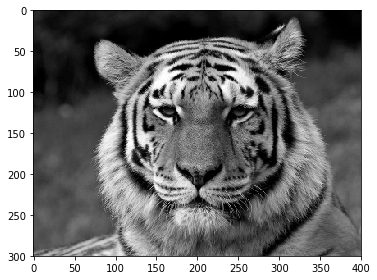

In [176]:
img = imread('https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png')
imshow(img)

## Box-фильтр

In [177]:
def box_filter(img,k):
    int_img = integral_image(img)*4 #получение интегрального изображения
    n=img.shape[0]-(k//2)*2
    m=img.shape[1]-(k//2)*2
    result = np.zeros([n,m],np.uint32)
    for i in range(n):
        for j in range (m):
            result[i,j]=integrate(int_img,(i,j),(i+4,j+4))
    result=np.uint8(result//100)
    return result

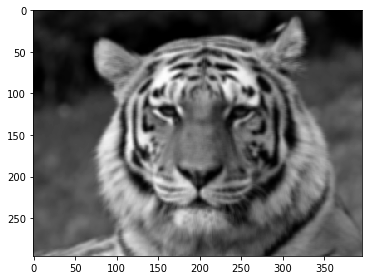

In [178]:
img_box=box_filter(img,5)
imshow(img_box)

### Сравнение результатов

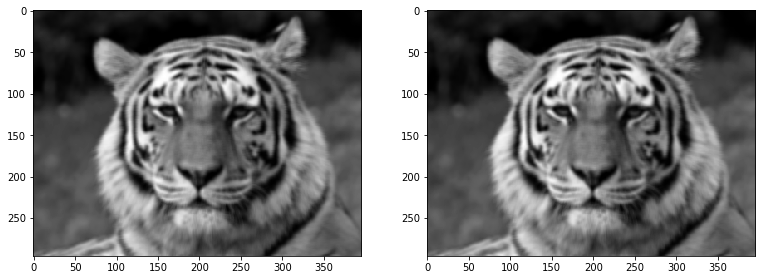

In [179]:
img_et = imread('https://stepik.org/media/attachments/lesson/61037/box-tiger.png') #эталонный результат

plt.figure(figsize=(20,10))
plt.set_cmap(cmap="gray")
plt.subplot(2,3,1)
plt.imshow(img_box)
plt.subplot(2,3,2)
plt.imshow(img_et)

## Подсчет функции Гаусса

In [180]:
def gauss_func(sigma,x,y):
    return exp((-pow(x,2)-pow(y,2))/(2*pow(sigma,2)))*(1/(2*pi*pow(sigma,2)))

In [181]:
print("Значение функции Гаусса для входных данных (1,1,1):", gauss_func(1,1,1))

Значение функции Гаусса для входных данных (1,1,1): 0.05854983152431917


## Ядро гауссовского фильтра

In [182]:
def gauss_kernel(sigma):
    kernel = np.zeros((round(6*sigma)+1,round(6*sigma)+1)) #длина и ширина ядра 6*sigma + 1, где sigma - радиус ядра
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            kernel[i][j]=gauss_func(sigma,max(i,ceil(kernel.shape[0]//2))-min(i,ceil(kernel.shape[0]//2)),max(j,ceil(kernel.shape[1]//2))-min(j,ceil(kernel.shape[1]//2)))
        summ = sum(kernel.ravel())
        kernel_norm=kernel/summ
    return kernel_norm

In [183]:
print("Ядро гауссовского фильра для sigma = 0.33:\n",np.round(gauss_kernel(0.33),5))

Ядро гауссовского фильра для sigma = 0.33:
 [[1.0000e-04 9.7400e-03 1.0000e-04]
 [9.7400e-03 9.6065e-01 9.7400e-03]
 [1.0000e-04 9.7400e-03 1.0000e-04]]


## Гауссовская фильтрация

In [184]:
def gaussian_filter(img, sigma):
    kernel = gauss_kernel(sigma)
    result = np.clip(convolve2d(img/255,kernel,mode='valid'),0,1)
    result = np.floor(result*255).astype('uint8')
    return result

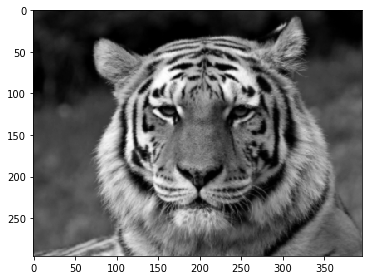

In [185]:
img_gauss = gaussian_filter(img, 0.66)
imshow(img_gauss)

### Сравнение результатов

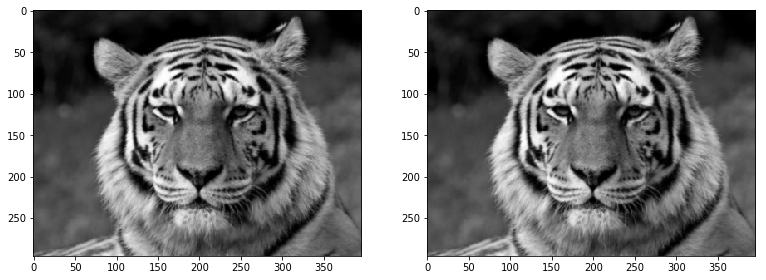

In [186]:
img_et = imread('https://stepik.org/media/attachments/lesson/61037/gaussian-tiger.png') #эталонный результат

plt.figure(figsize=(20,10))
plt.set_cmap(cmap="gray")
plt.subplot(2,3,1)
plt.imshow(img_gauss)
plt.subplot(2,3,2)
plt.imshow(img_et)

## Повышение резкости изображения

In [187]:
def sharpness_filter(img, alpha):
    kernel = 0.1*np.array([[-1,-2,-1], [-2, 22, -2], [-1, -2, -1]]) 
    result = np.clip(convolve2d(img/255,alpha*kernel,mode='valid'),0,1)
    result = np.floor(result*255).astype('uint8')
    return result

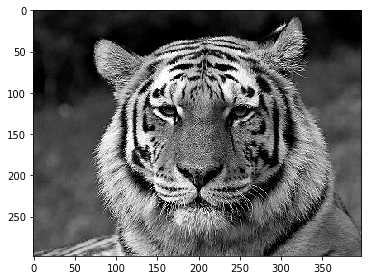

In [188]:
img_sharp = sharpness_filter(img, 1)
imshow(img_sharp)

### Сравнение результатов

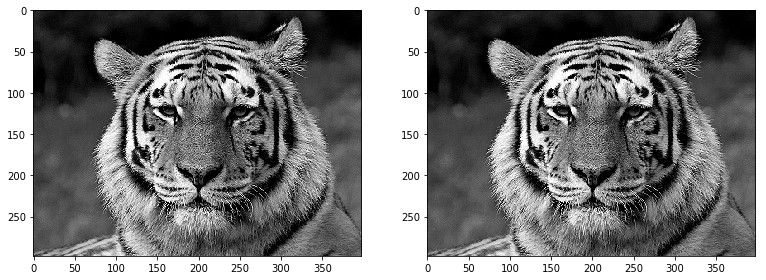

In [189]:
img_et = imread('https://stepik.org/media/attachments/lesson/61037/unsharp-tiger.png') #эталонный результат

plt.figure(figsize=(20,10))
plt.set_cmap(cmap="gray")
plt.subplot(2,3,1)
plt.imshow(img_sharp)
plt.subplot(2,3,2)
plt.imshow(img_et)

## Медианный фильтр

In [190]:
def median_filter(img,window):
    n=img.shape[0]-(window//2)*2 #размер конечного изображения с вычетом краевых пикселей
    m=img.shape[1]-(window//2)*2
    result = np.zeros([n,m],np.uint32)
    for i in range(n):
        for j in range (m):
            kernel = img[i:i+window,j:j+window] #определение окрестности пикселя
            median = int(np.median(kernel.ravel())) #нахождение медианы
            result[i][j] = median
    result=np.uint8(result)
    return result

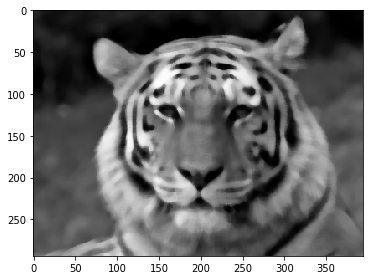

In [191]:
img_median=median_filter(img,7)
imshow(img_median)

### Сравнение результатов

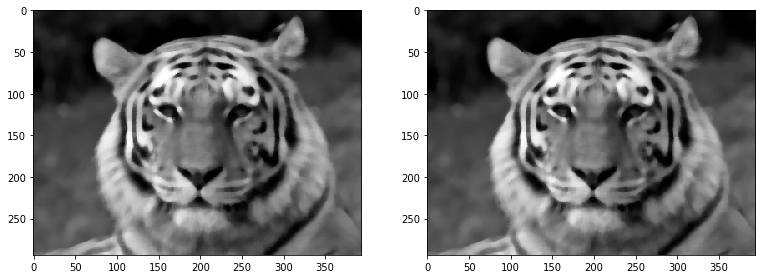

In [194]:
img_et = imread('https://stepik.org/media/attachments/lesson/61041/median-tiger.png') #эталонный результат

plt.figure(figsize=(20,10))
plt.set_cmap(cmap="gray")
plt.subplot(2,3,1)
plt.imshow(img_median)
plt.subplot(2,3,2)
plt.imshow(img_et)

## Дополнительные фильтры

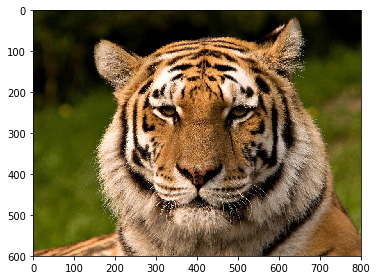

In [213]:
img=imread('https://stepik.org/media/attachments/lesson/60609/tiger-color.png')
imshow(img)

In [217]:
img_gray = rgb2gray(img)

## Выделение границ

In [214]:
def edge_detection_filter(img):
    kernel_Dx = np.array([[0, 0 ,0], [-1, 0, 1], [0, 0, 0]]) 
    kernel_Dy = np.array([[0, 1 ,0], [0, 0, 0], [0, -1, 0]]) 
    result_Dx = convolve2d(img,kernel_Dx,mode='valid')
    result_Dy = convolve2d(img,kernel_Dy,mode='valid')
    return (result_Dx, result_Dy)

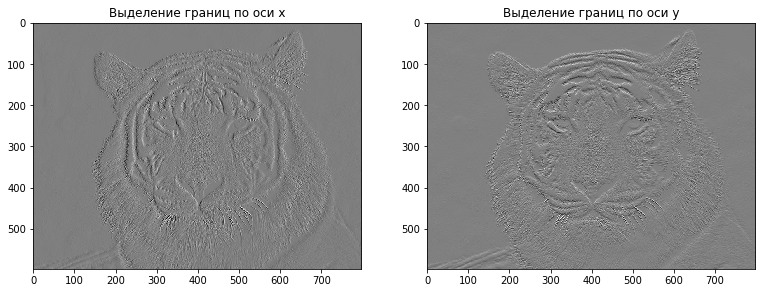

In [218]:
img_edge_x, img_edge_y =edge_detection_filter(img_gray)

plt.figure(figsize=(20,10))
plt.set_cmap(cmap="gray")
plt.subplot(2,3,1)
plt.title("Выделение границ по оси x")
plt.imshow(img_edge_x)
plt.subplot(2,3,2)
plt.title("Выделение границ по оси y")
plt.imshow(img_edge_y)

## Фильтр Превитта

In [198]:
def previtt_filter(img):
    kernel_Px = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]) 
    kernel_Py = np.array([[1, 1 , 1], [0, 0, 0], [-1, -1, -1]]) 
    result_Px = convolve2d(img,kernel_Px,mode='valid')
    result_Py = convolve2d(img,kernel_Py,mode='valid')
    return (result_Px, result_Py)

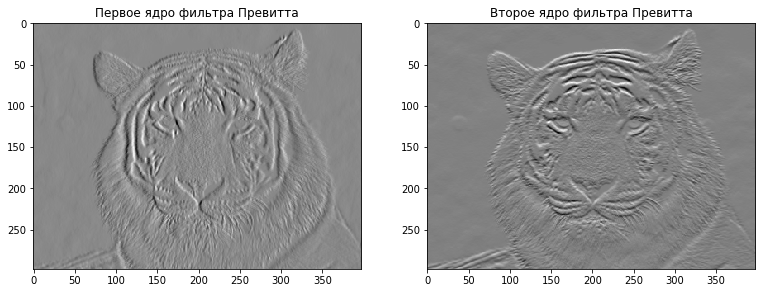

In [164]:
img_previtt_x, img_previtt_y = previtt_filter(img_gray)

plt.figure(figsize=(20,10))
plt.set_cmap(cmap="gray")
plt.subplot(2,3,1)
plt.title("Первое ядро фильтра Превитта")
plt.imshow(img_previtt_x)
plt.subplot(2,3,2)
plt.title("Второе ядро фильтра Превитта")
plt.imshow(img_previtt_y)

## Фильтр Собеля

In [199]:
def sobel_filter(img):
    kernel_Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) 
    kernel_Sy = np.array([[1, 2 , 1], [0, 0, 0], [-1, -2, -1]]) 
    result_Sx = convolve2d(img,kernel_Sx,mode='valid')
    result_Sy = convolve2d(img,kernel_Sy,mode='valid')
    return (result_Sx, result_Sy)

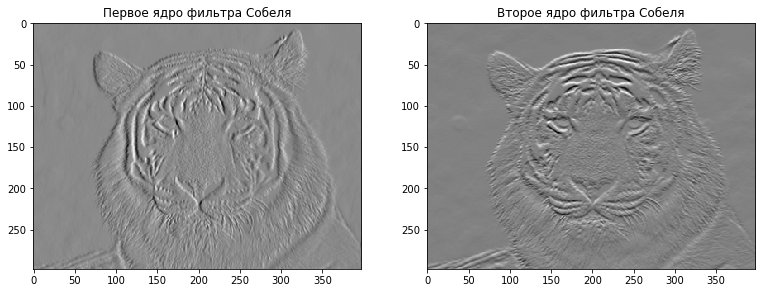

In [200]:
img_sobel_x, img_sobel_y = sobel_filter(img_gray)

plt.figure(figsize=(20,10))
plt.set_cmap(cmap="gray")
plt.subplot(2,3,1)
plt.title("Первое ядро фильтра Собеля")
plt.imshow(img_sobel_x)
plt.subplot(2,3,2)
plt.title("Второе ядро фильтра Собеля")
plt.imshow(img_sobel_y)

## Лапласиан

In [205]:
def laplasian_filter(img):
    kernel_Lx = np.array([[0, 1, 0], [-1, 4, -1], [0, 1, 0]]) 
    kernel_Ly = np.array([[-1, -1 , -1], [-1, 8, -1], [-1, -1, -1]]) 
    result_Lx = convolve2d(img,kernel_Lx,mode='valid')
    result_Ly = convolve2d(img,kernel_Ly,mode='valid')
    return (result_Lx, result_Ly)

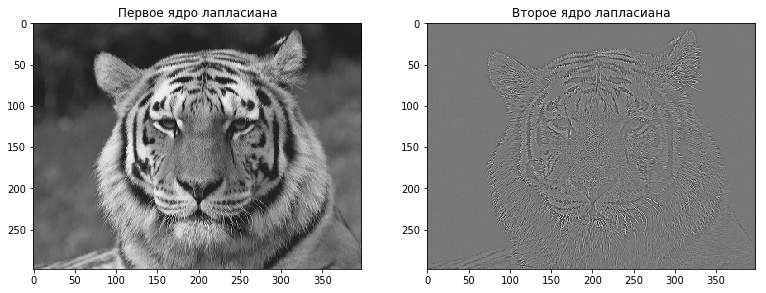

In [206]:
img_laplasian_x, img_laplasian_y = laplasian_filter(img_gray)

plt.figure(figsize=(20,10))
plt.set_cmap(cmap="gray")
plt.subplot(2,3,1)
plt.title("Первое ядро лапласиана")
plt.imshow(img_laplasian_x)
plt.subplot(2,3,2)
plt.title("Второе ядро лапласиана")
plt.imshow(img_laplasian_y)

## Фильтр тиснения

In [207]:
def emboss_filter(img):
    kernel = np.array([[0, 1 ,0], [-1, 0, 1], [0, -1, 0]]) 
    result = convolve2d(img,kernel,mode='valid')
    return result

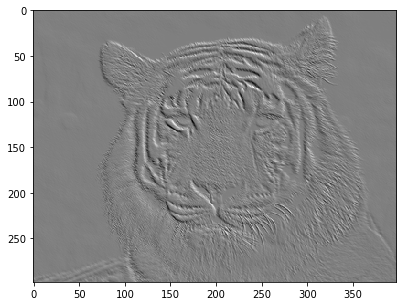

In [209]:
img_emboss=emboss_filter(img)

plt.figure(figsize=(10,5))
plt.set_cmap(cmap="gray")
plt.imshow(img_stamp)

## Фильтр повышения контрастности

In [267]:
def contrast_filter(img):
    kernel = np.array([[-1,-1,-1], [-1, 9, -1], [-1, -1, -1]]) 
    
    if len(img.shape)<3: #для черно-белого изображение
        result = convolve2d(img,kernel,mode='same')
        return result
    
    r=img[:,:,0] #выделение каналов на цветном изображении
    g=img[:,:,1]
    b=img[:,:,2]
    
    r = convolve2d(r, kernel, mode = "same") #применение фильтра к каждому каналу
    g = convolve2d(g, kernel, mode = "same")
    b = convolve2d(b, kernel, mode = "same")
    
    result = np.clip(np.dstack((r,g,b)),0,255)
    return result

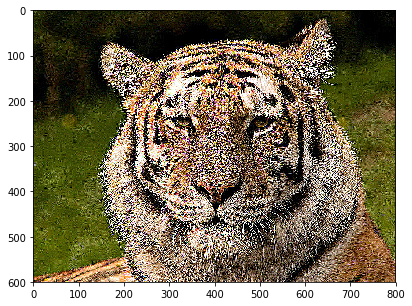

In [266]:
img_contrast=contrast_filter(img)

plt.figure(figsize=(10,5))
plt.imshow(img_contrast)

## Акварельный фильтр 

In [303]:
def watercolor_filter(img, window, alpha):
    r=img[:,:,0] #выделение каналов на цветном изображении
    g=img[:,:,1]
    b=img[:,:,2]
    
    #сглаживание цветов в изображении посредством медианного фильтра
    r = median_filter(r,window) #применение медианного фильтра к каждому каналу
    g = median_filter(g,window)
    b = median_filter(b,window)
    
    #обработка ядром резкости
    r = sharpness_filter(r,alpha) #применение фильтра резкости к каждому каналу
    g = sharpness_filter(g,alpha)
    b = sharpness_filter(b,alpha)
    
    result = np.clip(np.dstack((r,g,b)),0,255)
    return result

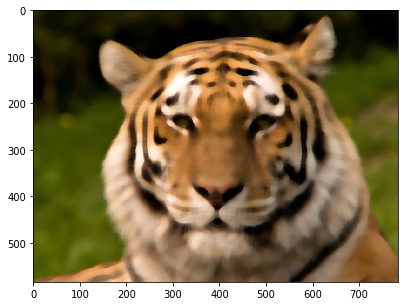

In [304]:
img_watercolor = watercolor_filter(img,15,1)

plt.figure(figsize=(10,5))
plt.imshow(img_watercolor)